# Exploratory Data Analysis of Cars.csv

## 1) Loading the libraries and the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import grafici

In [2]:
# read the csv
cars = pd.read_csv('Cleaned_Data/cars.csv')

In [3]:
# modify again the release_date column
cars['release_date'] = pd.to_datetime(cars['release_date'])

## 2) Analyse all columns one by one

In [4]:
# list the columns
cars.dtypes

car_id                  object
car_model               object
fuel_type               object
release_date    datetime64[ns]
price                    int64
dtype: object

We have already checked that the id is unique, so we can skip that

### Car_model column

<Axes: xlabel='car_model'>

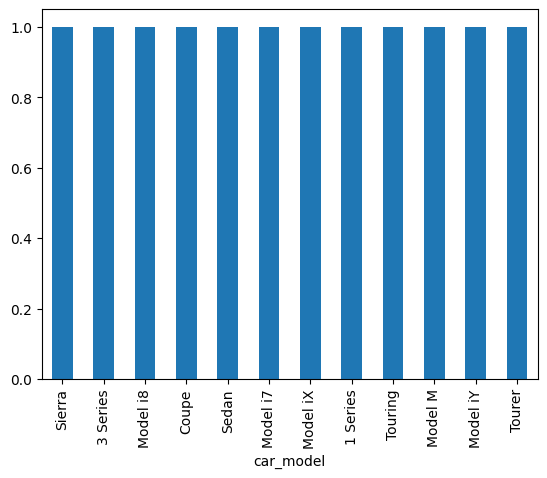

In [5]:
cars["car_model"].value_counts().plot(kind='bar')

In this case I will not do anything for this column, if I had more time I could try to get more information online for each model.

### Fuel type column

In [6]:
# unique values of the column
cars['fuel_type'].value_counts()

fuel_type
Gasoline    5
Electric    4
Diesel      3
Name: count, dtype: int64

<Axes: xlabel='fuel_type'>

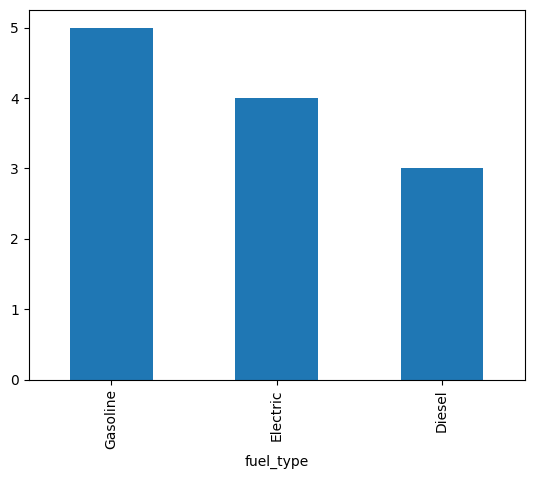

In [7]:
# plot the fuel_type distribution
cars['fuel_type'].value_counts().plot(kind='bar')

We can notice that the dataset is umbalanced and there are no hybrid or hydrogen vehicles

For example the i8 in the real world is hybrid, in this case it's just electric

In [8]:
cars[cars['car_model'] == 'Model i8']['fuel_type']

2    Electric
Name: fuel_type, dtype: object

### Release date column

<Axes: xlabel='release_date'>

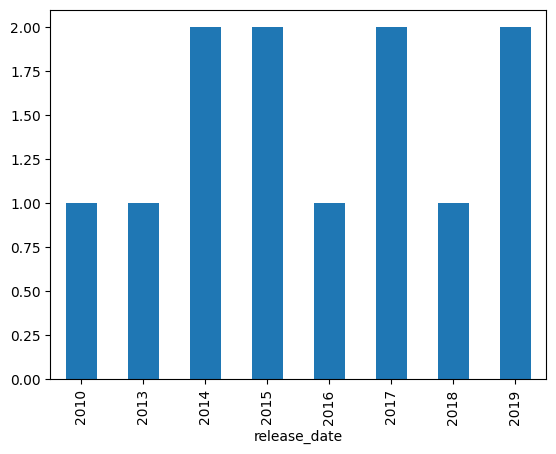

In [9]:
# plot the release_date grouped by year
cars['release_date'].dt.year.value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='release_date'>

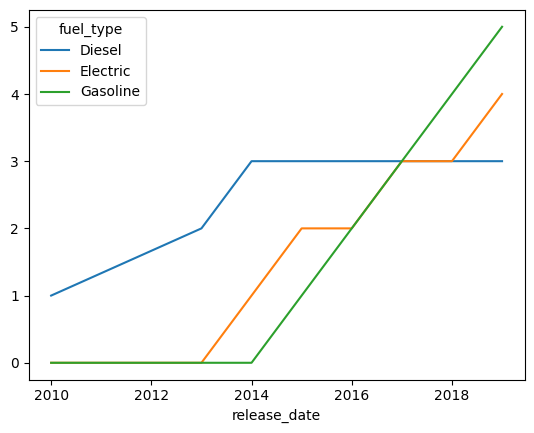

In [10]:
# plot the number of fuel types for each year of release date by summing the values forward
cars.groupby([cars['release_date'].dt.year, 'fuel_type']).size().unstack().fillna(0).cumsum().plot()

according on this data we can say that diesel is no longer being produced, electric continues to grow but at a slower rate than gasoline

### Price column

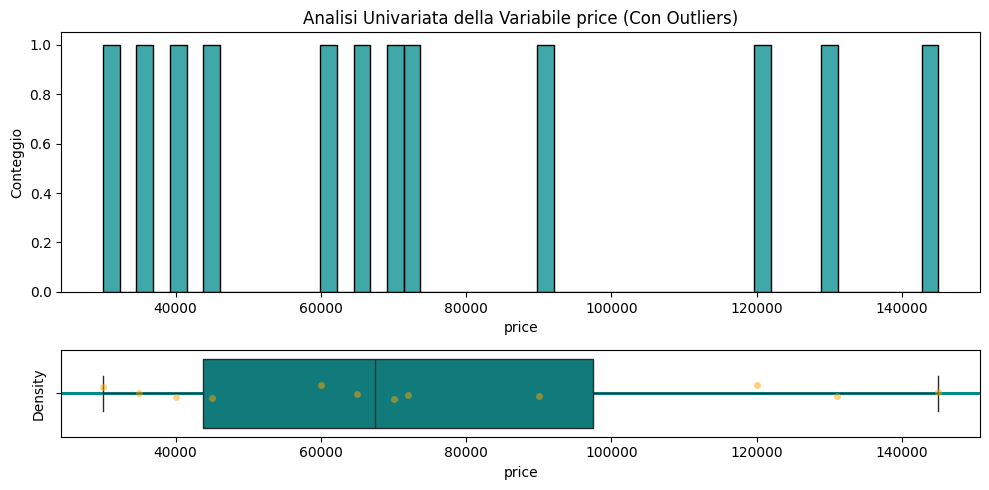

In [11]:
# plot the price distribution
grafici.plot_numeric_column(cars, 'price', color="darkcyan", contrast="orange", figsize=(10, 5), exclude_outliers=False)

We can see that there are 3 groups of price (low, middle, high)

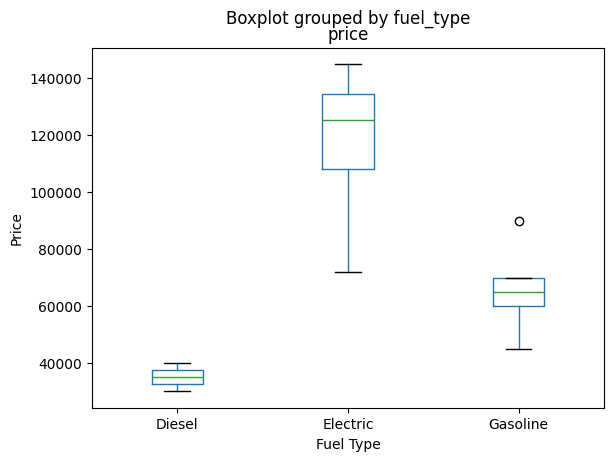

In [12]:
# plot the price distribution based on the fuel type
cars.boxplot(column='price', by='fuel_type', grid=False)
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

Sadly the electric ones are the most expensive

This is all that we can explore on this csv, we will merge it with the others for further insights